**TASK 1**

In [3]:
import numpy as np
import pandas as pd
import itertools

d1a = pd.read_csv("/content/Lab2 D1A.csv")
d1a.head()

,fid,name,population,county,latitude
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597
1,9002,SETON ACADEMY FOR GIRLS,57,BRISTOL,41.718407
2,9003,ST ANNA SCHOOL,157,WORCESTER,42.517271
3,9004,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,41.818210
4,9005,DEVEREUX SCHOOL,123,WORCESTER,42.383875


In [3]:
d1b = pd.read_csv("/content/Lab2 D1B.csv")
d1b.head()

,name,population,county,longitude,level,enrollment,level.1
0,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary
1,SETON ACADEMY FOR GIRLS,57,BRISTOL,-71.147302,Elementary,49,Elementary
2,ST ANNA SCHOOL,157,WORCESTER,-71.751741,Elementary,143,Elementary
3,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,-71.083393,Elementary,4,Elementary
4,DEVEREUX SCHOOL,123,WORCESTER,-71.968419,Combined elementary and secondary,107,Combined elementary and secondary


In [5]:
d1c = pd.read_csv("/content/Lab2 D1C.csv")
d1c.head()

,county,city,score
0,BRISTOL,SWANSEA,16
1,BRISTOL,FALL RIVER,8
2,WORCESTER,LEOMINSTER,14
3,PLYMOUTH,MIDDLEBORO,1
4,WORCESTER,RUTLAND,16


In [4]:
dup = [ col for col in d1b.columns if col in d1a.columns]
d1b_new = d1b.drop(columns=dup)
combine = pd.concat([d1a,d1b_new],axis=1)
print(combine.head())
print(combine.shape)

    fid                                        name  population     county  \
0  9001               NEW ENGLAND CHRISTIAN ACADEMY         136    BRISTOL   
1  9002                     SETON ACADEMY FOR GIRLS          57    BRISTOL   
2  9003                              ST ANNA SCHOOL         157  WORCESTER   
3  9004  SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL           5   PLYMOUTH   
4  9005                             DEVEREUX SCHOOL         123  WORCESTER   

    latitude  longitude                              level  enrollment  \
0  41.758597 -71.175801  Combined elementary and secondary         120   
1  41.718407 -71.147302                         Elementary          49   
2  42.517271 -71.751741                         Elementary         143   
3  41.818210 -71.083393                         Elementary           4   
4  42.383875 -71.968419  Combined elementary and secondary         107   

                             level.1  
0  Combined elementary and secondary  
1       

In [5]:
print(set(d1a.columns) & set(d1c.columns))

{'county'}


In [6]:
combAC = pd.merge(d1a,d1c,on="county", how="inner")
print(combAC.shape)
print(combAC.columns)

(4221333, 7)
Index(['fid', 'name', 'population', 'county', 'latitude', 'city', 'score'], dtype='object')


**TASK** 2

Customized you own dataset with the name “customizedData”, add at least one attribute
that should be similar to Lab2 D1A, Lab2 D1B, Lab2 D1C dataset , now add 3 attributes
of Size (small, ,medium, and high), cardinal direction ( North, South, East and West) ,
Timings (full time , part time) and add 2 attributes of your own choice, one attribute should
be categorical and one should be continuous.
B. Merge “customizedData” with Lab2 D1A, Lab2 D1B, Lab2 D1C and produce a resultand
dataset with the name of “modifiedData” and explore/ analyze its number of records and
features before and after merging with the technique of similar records joining.

In [6]:
n = min(len(d1a),len(d1b),len(d1c))

customizedData = pd.DataFrame({
    "name" : d1a["name"].head(n),
    "population" : d1a["population"].head(n),
    "level" : d1b["level"].head(n),
    "county" : d1c["county"].head(n),
    "size" : list(itertools.islice(itertools.cycle(["small","medium","high"]),n)),
    "cardinal direction" : list(itertools.islice(itertools.cycle(["north","south","east","west"]),n)),
    "timings" : list(itertools.islice(itertools.cycle(["fulltime","parttime"]),n)),
    "wages" : np.random.randint(1000,5000,size=n),
    "dept" : list(itertools.islice(itertools.cycle(["HR","manager","clerk"]),n))

})
print(customizedData.head(5))

                                         name  population  \
0               NEW ENGLAND CHRISTIAN ACADEMY         136   
1                     SETON ACADEMY FOR GIRLS          57   
2                              ST ANNA SCHOOL         157   
3  SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL           5   
4                             DEVEREUX SCHOOL         123   

                               level     county    size cardinal direction  \
0  Combined elementary and secondary    BRISTOL   small              north   
1                         Elementary    BRISTOL  medium              south   
2                         Elementary  WORCESTER    high               east   
3                         Elementary   PLYMOUTH   small               west   
4  Combined elementary and secondary  WORCESTER  medium              north   

    timings  wages     dept  
0  fulltime   1976       HR  
1  parttime   1190  manager  
2  fulltime   2218    clerk  
3  parttime   4823       HR  
4  fulltime   

Merge “customizedData” with Lab2 D1A, Lab2 D1B, Lab2 D1C and produce a resultand
dataset with the name of “modifiedData” and explore/ analyze its number of records and
features before and after merging with the technique of similar records joining.

In [ ]:
print("Data1 shape:", d1a.shape)
print("Data2 shape:", d1b.shape)
print("Data3 shape:", d1c.shape)
print("CustomizedData shape:", customizedData.shape)


modifiedData = pd.merge(d1a, d1b, on="county", how='inner')
modifiedData = modifiedData.merge(d1c, on="county", how='inner')
modifiedData = modifiedData.merge(customizedData, on="county", how='inner')

print(modifiedData.shape)
modifiedData

Data1 shape: (26983, 5)
Data2 shape: (26983, 7)
Data3 shape: (26983, 3)
CustomizedData shape: (26983, 9)


**TASK 3**

How to organize your code (Create a Text block for Importing Libraries in next cell import
required library now Create a Heading for Data Preprocessing and the add a new cell for Data
analysis. Create headings for each cell)

A. Download the dataset from Here

B. Import your dataset in Colab or Jupyter notebook

C. Calculate the correlation between these variables,Var3,Var38,Var15,
imp_op_var39_comer_ult1

D. Check whether the data is linear or not and write a brief explanation what you have analyzed in text cell

E. Check whether the data contain any missing record, if yes then perform imputation using
an average method.

F. In your dataset, you have some interesting variables. Think of multi-variable research questions that you can explore with these data and explore. You need to do at least 5 explorations that include data visualizations, numerical summary.

G. Find out the unique category in target variable and check whether your dataset is balanced or not.

H. If dataset is not balanced, then handle your dataset and balance it using Up sampling

I. Find out the total number of features and records and perform feature selection using Pearson Correlation having threshold equal to 65%.

J. Make a copy of your dataset and perform feature selection other than Pearson and Variance
threshold.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/train.csv")
print(df.head(10))

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   
5  13     2     23                 0.0                      0.0   
6  14     2     27                 0.0                      0.0   
7  18     2     26                 0.0                      0.0   
8  20     2     45                 0.0                      0.0   
9  23     2     25                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                     

                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


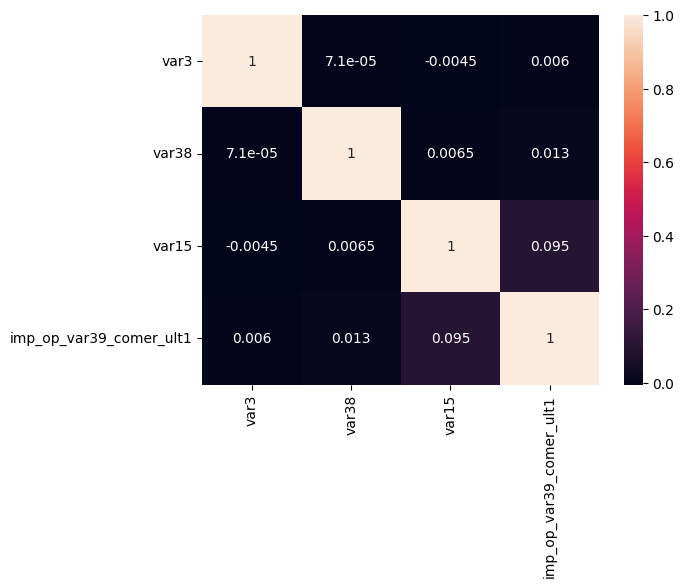

In [13]:
print(df[['var3','var38','var15','imp_op_var39_comer_ult1']].corr())

sns.heatmap(df[['var3','var38','var15','imp_op_var39_comer_ult1']].corr(), annot=True)
plt.show()

In [19]:
corr = df[['var3', 'var38']].corr().iloc[0,1]
print("Correlation:", corr)

"""The correlation between var3 and var38 is approximately 0.00007, which is very close to zero.
This indicates that there is no significant linear relationship between these two variables."""

Correlation: 7.084161239995107e-05


'The correlation between var3 and var38 is approximately 0.00007, which is very close to zero. \nThis indicates that there is no significant linear relationship between these two variables.'

In [21]:
df.isnull().sum()

,0
ID,0
var3,0
var15,0
imp_ent_var16_ult1,0
imp_op_var39_comer_ult1,0
...,...
saldo_medio_var44_hace3,0
saldo_medio_var44_ult1,0
saldo_medio_var44_ult3,0
var38,0


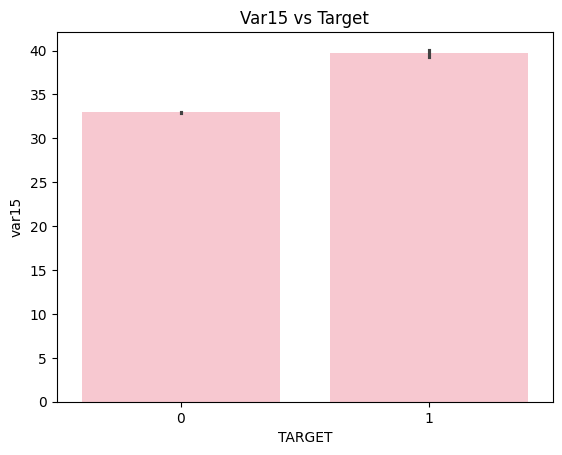

In [23]:
sns.barplot(x='TARGET', y='var15', data=df, color="pink")
plt.title("Var15 vs Target")
plt.show()

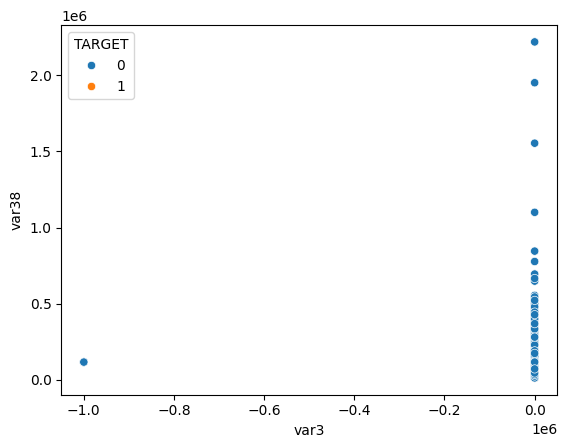

In [24]:
sns.scatterplot(x='var3', y='var38', hue='TARGET', data=df.sample(2000))
plt.show()

In [25]:
print(df['TARGET'].unique())

print(df['TARGET'].value_counts())

# Dataset is not balanced

[0 1]
TARGET
0    73012
1     3008
Name: count, dtype: int64


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

TARGET
0    73012
1    73012
Name: count, dtype: int64


In [27]:
corr_target = df.corr()['TARGET'].abs()
selected_features = corr_target[corr_target > 0.65]
print("Selected features:", selected_features)

Selected features: TARGET    1.0
Name: TARGET, dtype: float64


In [29]:
from sklearn.feature_selection import SelectKBest

df_copy = df.copy()

X = df_copy.drop('TARGET', axis=1)
y = df_copy['TARGET']

selector = SelectKBest(k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features.tolist())

df_other_selected = df_copy[selected_features]

['ind_var5', 'ind_var30', 'num_var30', 'num_var42', 'num_meses_var5_ult3']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


**TASK 4**

A. Create a survey form (ask for the approval in order to avoid duplicate content) , ask some
questions , Make sure to choose your question wisely, your attributes should reflect more to
your problem statement. User have to answer atleast 5 questions and the remaining one will
be depend on user, whether to answer or not.

B. The questionnaire will contains at least 10 questions and you have to collect dataset from
minimum 100 individuals

C. After collecting dataset, Perform some Statistical analysis over it, Do some Graphical
Visualization, Check whether the dataset you have collected is balanced or not.

D. Perform Data wrangling, If the dataset contain any missing records try to handle these
missing values wisely.

E. If you found your dataset is not balanced then choose a technique other than smote or
NearMiss

F. Perform feature selection technique other than Variance Threshold and Pearson correlation
and explain in a text cell its working.

G. If the dataset contain any categorical feature then encode it using Dummy Encoding, and
explain the difference between dummy encoding and one hot encoding

H. Check whether your dataset contain any duplicate records, if it does, then handle these
records with atleast 2 techniques.